In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv(r"C:\Users\Darshan\Downloads\Daily Household Transactions.csv")
df

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR
...,...,...,...,...,...,...,...,...
2456,1/1/2015,Cash,Transportation,NaN,share jeep - Place T base to top,20.0,Expense,INR
2457,1/1/2015,Cash,Transportation,NaN,share auto - Place H to Place T base,20.0,Expense,INR
2458,1/1/2015,Cash,Transportation,NaN,bus - brc to Place H,30.0,Expense,INR
2459,1/1/2015,Cash,Food,NaN,tea,10.0,Expense,INR


In [3]:
df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     1826 non-null   object 
 4   Note            1940 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB


In [5]:
df.describe()

,Amount
count,2461.000000
mean,2751.145380
std,12519.615804
min,2.000000
25%,35.000000
50%,100.000000
75%,799.000000
max,250000.000000


In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2456    False
2457    False
2458    False
2459    False
2460    False
Length: 2461, dtype: bool

In [8]:
df.isna().sum()

Date                0
Mode                0
Category            0
Subcategory       635
Note              521
Amount              0
Income/Expense      0
Currency            0
dtype: int64

In [9]:
df

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR
...,...,...,...,...,...,...,...,...
2456,1/1/2015,Cash,Transportation,NaN,share jeep - Place T base to top,20.0,Expense,INR
2457,1/1/2015,Cash,Transportation,NaN,share auto - Place H to Place T base,20.0,Expense,INR
2458,1/1/2015,Cash,Transportation,NaN,bus - brc to Place H,30.0,Expense,INR
2459,1/1/2015,Cash,Food,NaN,tea,10.0,Expense,INR


In [10]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [15]:
df['Amount'] = df['Amount'].astype(float)

In [16]:
df.dtypes

Date               object
Mode               object
Category           object
Subcategory        object
Note               object
Amount            float64
Income/Expense     object
Currency           object
dtype: object

In [20]:
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [21]:
df= df.dropna()  

In [22]:
df.dtypes

Date               object
Mode               object
Category           object
Subcategory        object
Note               object
Amount            float64
Income/Expense     object
Currency           object
dtype: object

In [24]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  

C:\Users\Divya\AppData\Local\Temp\ipykernel_9296\3526843205.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [25]:
df.dtypes

Date              datetime64[ns]
Mode                      object
Category                  object
Subcategory               object
Note                      object
Amount                   float64
Income/Expense            object
Currency                  object
dtype: object

In [30]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

In [31]:
df

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,2018-09-20 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,2018-09-20 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,NaT,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,2018-09-17 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,2018-09-16 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR
...,...,...,...,...,...,...,...,...
2329,2015-02-23 19:37:47,Cash,Transportation,Train,Place 0 to Bandra,20.0,Expense,INR
2330,2015-02-23 18:39:59,Cash,Apparel,Footwear,shoe polish,20.0,Expense,INR
2331,2015-02-23 15:43:13,Credit Card,Transportation,train,to and fro Mum to BRC,526.0,Expense,INR
2333,2015-02-19 20:52:01,Cash,Health,Health,face mask,45.0,Expense,INR


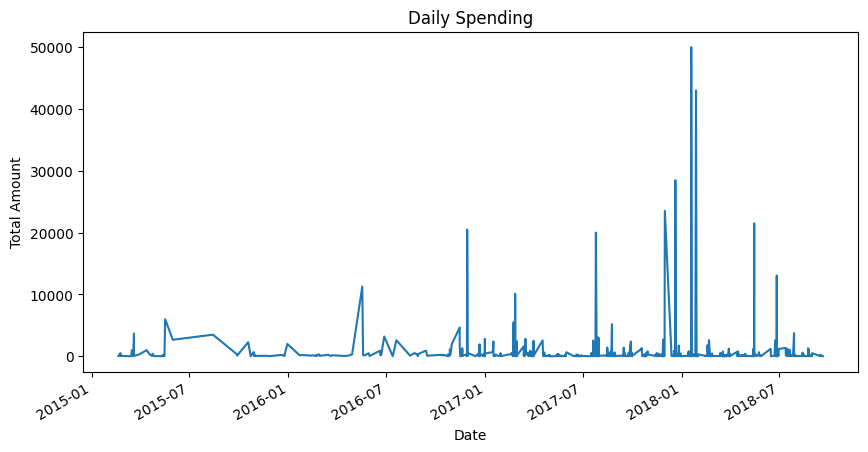

In [34]:
import matplotlib.pyplot as plt

# Example: Total spending over time
if 'Date' in df.columns and 'Amount' in df.columns:
    df.groupby('Date')['Amount'].sum().plot(figsize=(10, 5), title='Daily Spending', ylabel='Total Amount')
    plt.show()


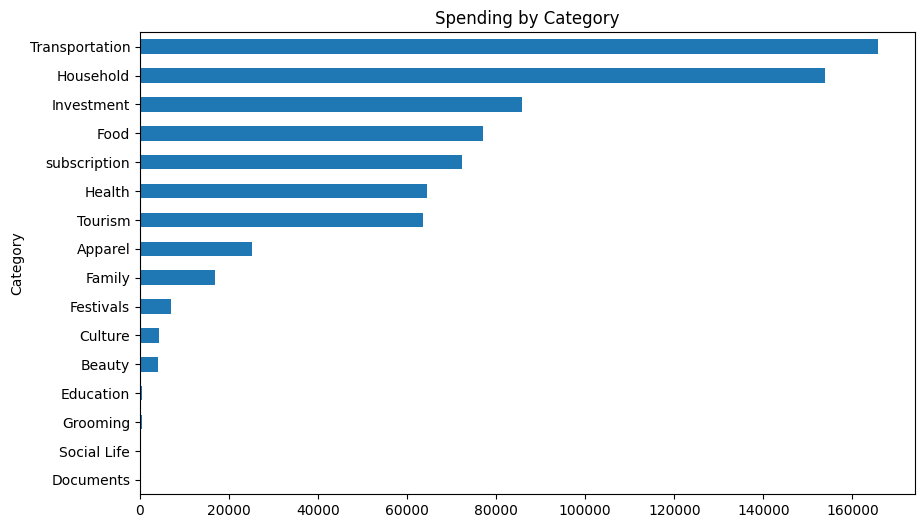

In [35]:
# Assuming a 'category' column exists
if 'Category' in df.columns and 'Amount' in df.columns:
    df.groupby('Category')['Amount'].sum().sort_values().plot(kind='barh', figsize=(10, 6), title='Spending by Category')
    plt.show()


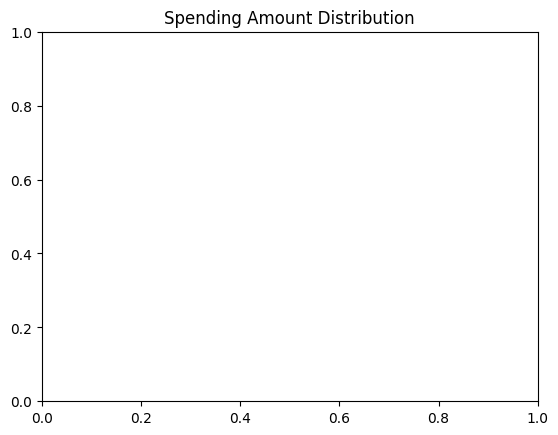

In [37]:
import seaborn as sns

# Distribution of spending amounts
sns.boxplot(df=df, X='Amount')
plt.title('Spending Amount Distribution')
plt.show()


In [38]:
if 'Date' in df.columns:
    df['month'] = df['Date'].dt.month
    df['day_of_week'] = df['Date'].dt.day_name()

# Example: Monthly total spending
monthly_spending = df.groupby('month')['Amount'].sum()
print("\nMonthly Spending:")
print(monthly_spending)


Monthly Spending:
month
1.0     106585.90
2.0      31418.00
3.0      25792.75
4.0      13287.68
5.0      51049.00
6.0      34029.52
7.0      50204.36
8.0      29476.65
9.0      10538.00
10.0     15107.69
11.0     62741.00
12.0     46521.60
Name: Amount, dtype: float64


In [40]:
from statsmodels.tsa.arima.model import ARIMA

# Aggregate data by date for time series forecasting
if 'Date' in df.columns and 'Amount' in df.columns:
    daily_data = df.groupby('Date')['Amount'].sum()
    


In [43]:
    # Train an ARIMA model
    model = ARIMA(daily_data, order=(5, 1, 0))
    model_fit = model.fit()
    print(model_fit.summary())
 # Forecast
    forecast = model_fit.forecast(steps=30)  # Predict for the next 30 days
    print("\n30-Day Forecast:")
    print(forecast)
    
   

C:\Users\Divya\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Divya\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Divya\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Amount   No. Observations:                  864
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -8190.793
Date:                Mon, 13 Jan 2025   AIC                          16393.586
Time:                        23:23:53   BIC                          16422.149
Sample:                             0   HQIC                         16404.519
                                - 864                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8300      0.017    -49.241      0.000      -0.863      -0.797
ar.L2         -0.6643      0.022    -30.898      0.000      -0.706      -0.622
ar.L3         -0.5032      0.023    -22.223      0.0

C:\Users\Divya\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Divya\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
